### Testing 3D data type 



In [1]:
include("../src/UNSflow.jl")
    

UNSflow

In [2]:
using UNSflow

In [3]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45*pi/180,pi/8,0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)





UNSflow.KinemDef3D(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [4]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin)

UNSflow.ThreeDSurf(1.0,10.0,10.0,1.0,UNSflow.patch[UNSflow.patch(0.0,-5.0,0.0,0.0,"FlatPlate",1.0,0.0,0.11,5),UNSflow.patch(0.0,0.0,0.0,0.0,"FlatPlate",1.0,0.0,0.11,5),UNSflow.patch(0.0,5.0,0.0,0.0,"FlatPlate",1.0,0.0,0.11,5)],70,11,35,70,UNSflow.KinemDef3D(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0]),[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.314159,0.628319,0.942478,1.25664,1.5708,1.88496,2.19911,2.51327,2.82743,3.14159,0.0,0.0,0.0,0.0,0.0],[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0

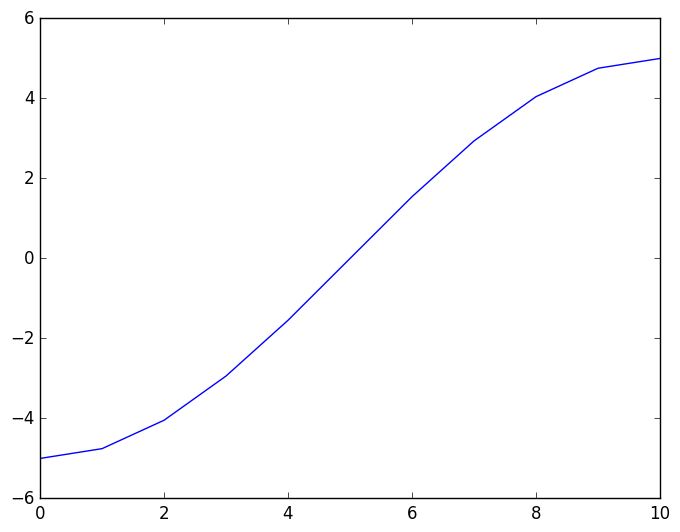

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32117a950>

In [5]:
plot(surf.yle[1:11])

In [15]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar)+1
mat, surf2d, field2d = LLT_ldvm(surf, field, nsteps, dtstar)


(
[0.0075 5.729e-9 3.91826e-21 -3.49458e-9; 0.015 1.08613e-9 5.40809e-22 -6.35912e-10; … ; 2.4975 4.42553 -0.0516596 -0.720741; 2.505 4.42631 -0.0486443 -0.722969],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.475

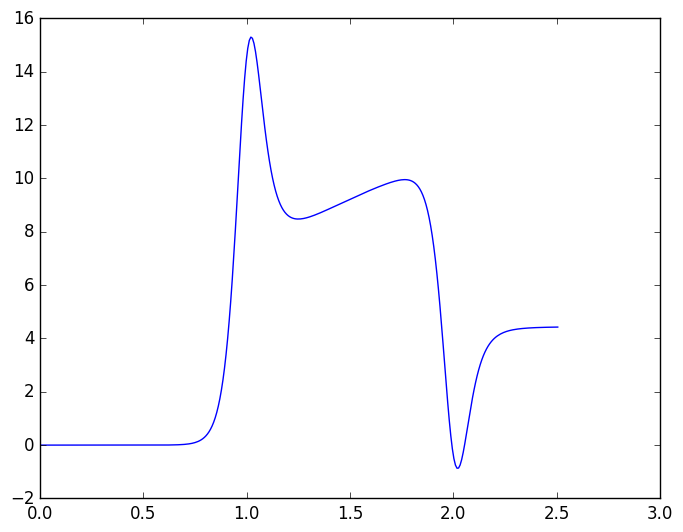

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3266ec110>

In [16]:
plot(mat[:,1],mat[:,2])